In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics

#load dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset/incident_profile_95_cleaned.csv')
df.columns.sort_values()

Index(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH', 'CRASH_YEAR',
       'adverse_weather_crash_rate', 'avg_age', 'avg_crash_severity_score',
       'avg_lighting_severity', 'avg_responsibility_score',
       'avg_roadway_severity', 'avg_weather_severity',
       'combined_weather_road_severity', 'damage_cost_LB', 'damage_high',
       'damage_low', 'damage_medium', 'fatality_rate', 'injury_severity_score',
       'monthly_total_units', 'neo_patented_drivers', 'night_crash_rate',
       'num_towed_units_LB', 'pct_neo_patented_drivers', 'pct_senior_drivers',
       'road_defect_crash_rate', 'senior_drivers', 'severe_injury_rate',
       'speeding_influence', 'sum_category_motorcycle',
       'sum_category_off-road/specialized', 'sum_category_passenger vehicle',
       'sum_category_public transport', 'sum_category_truck/commercial',
       'sum_damage_category_high', 'sum_damage_category_low',
       'sum_damage_category_medium', 'sum_lighting_category_daylight',
       'sum_lighting_category_n

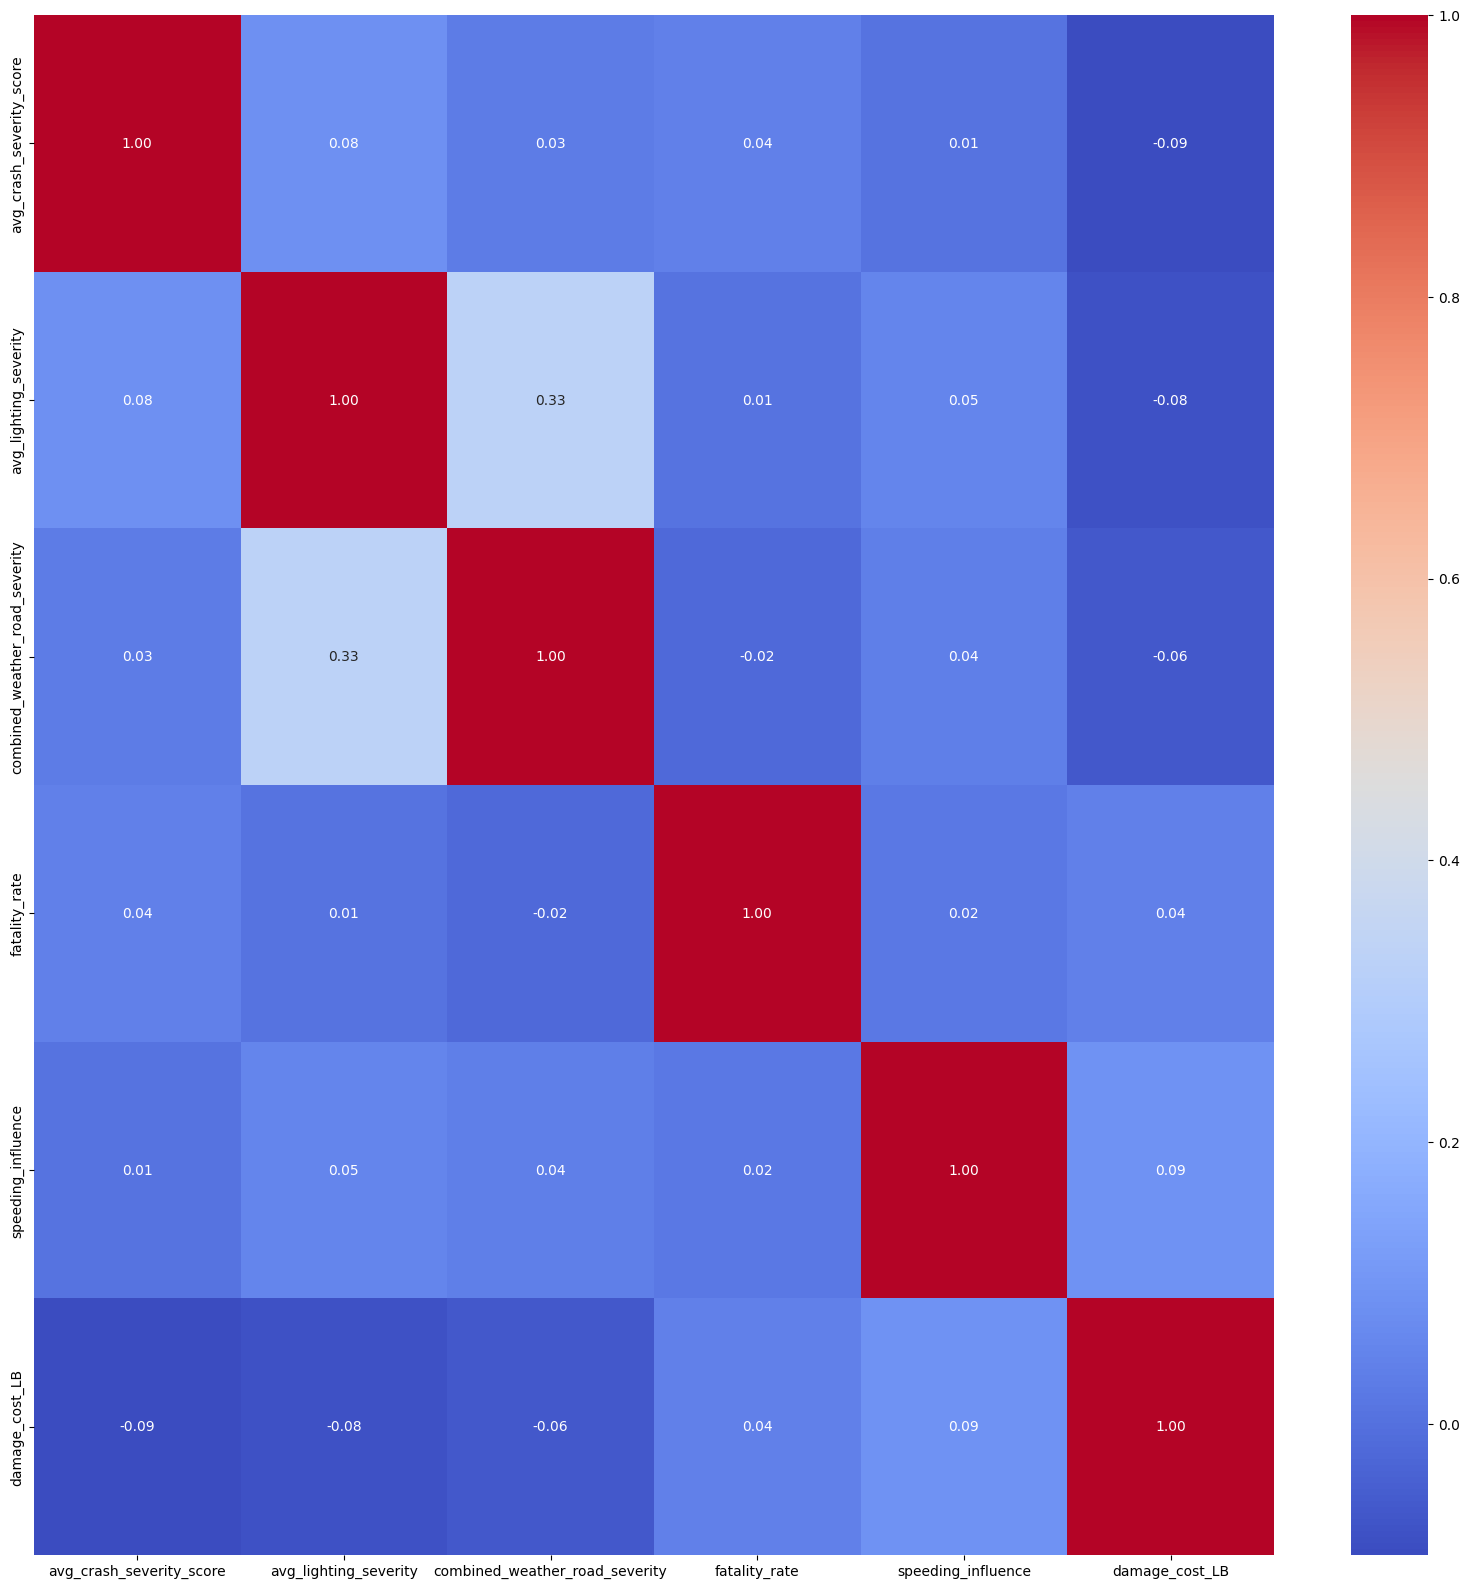

In [2]:
#dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

selected_features = ['avg_age', 'avg_weather_severity', 'fatality_rate', 'severe_injury_rate', 
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate']

selected_features = ['avg_crash_severity_score', 'avg_lighting_severity', 'combined_weather_road_severity', 'fatality_rate', 'speeding_influence', 'damage_cost_LB']
plt.figure(figsize=(20, 20))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [3]:
scaler_ss = StandardScaler()
df_cluster_ss = scaler_ss.fit_transform(df[selected_features])
df_cluster_ss = pd.DataFrame(df_cluster_ss, columns=df[selected_features].columns)
df_cluster_ss.head()

avg_crash_severity_score  avg_lighting_severity  \
0                 -0.594719               0.440448   
1                  0.702175              -0.714096   
2                 -1.384838               0.246690   
3                  0.021122               0.232783   
4                 -0.388483              -0.290854   

   combined_weather_road_severity  fatality_rate  speeding_influence  \
0                        0.528371      -0.169046            0.421623   
1                       -0.628140      -0.169046            0.178818   
2                        0.039103      -0.169046            0.237913   
3                        0.726945      -0.169046            2.777173   
4                        0.737382      -0.169046           -0.599440   

   damage_cost_LB  
0        0.775171  
1       -0.255078  
2       -0.934107  
3        3.748847  
4        1.126393

In [42]:
scaler_mm = MinMaxScaler()
df_cluster_mm = scaler_mm.fit_transform(df[selected_features])
df_cluster_mm = pd.DataFrame(df_cluster_mm, columns=df[selected_features].columns)
df_cluster_mm.head()

avg_crash_severity_score  avg_lighting_severity  \
0                  0.283227               0.485556   
1                  0.494819               0.287879   
2                  0.154317               0.452381   
3                  0.383704               0.450000   
4                  0.316875               0.360345   

   combined_weather_road_severity  fatality_rate  speeding_influence  \
0                        0.315582            0.0            0.253623   
1                        0.103879            0.0            0.212121   
2                        0.226020            0.0            0.222222   
3                        0.351931            0.0            0.656250   
4                        0.353842            0.0            0.079096   

   damage_cost_LB  
0        0.430328  
1        0.250000  
2        0.131148  
3        0.950820  
4        0.491803

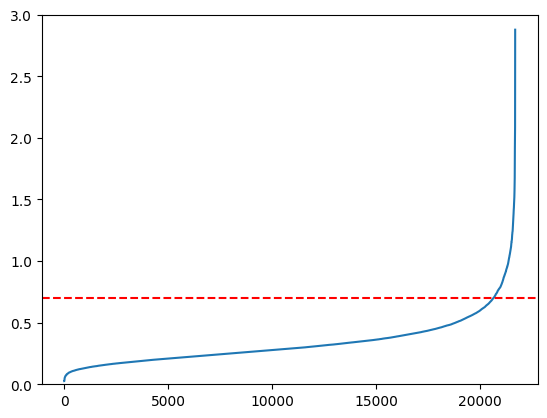

In [7]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=100)
nbrs = neigh.fit(df_cluster_ss)
distances, indices = nbrs.kneighbors(df_cluster_ss)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
#line on the elbow
plt.axhline(y=0.7, color='r', linestyle='--')
plt.ylim(0, 3)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from tqdm import tqdm

""" best_score = -1
best_min_samples = None
best_eps = None

# Define a range of values for min_samples
min_samples_range = range(15, 40)

# Define a range of values for eps (you can use the k-distance graph to narrow this range)
eps_range = np.arange(0.6, 0.9, 0.05)

scores = []

for min_samples in tqdm(min_samples_range, desc="min_samples"):
    for eps in tqdm(eps_range, desc="eps", leave=False):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_cluster_ss)
        
        score = silhouette_score(df_cluster_ss, labels)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        scores.append((score, min_samples, eps,n_clusters))
            
        
# Sort scores in descending order
scores.sort(reverse=True, key=lambda x: x[0])

#put scores in a csv
scores_df = pd.DataFrame(scores, columns=['score', 'min_samples', 'eps','n_clusters'])
scores_df.to_csv('dbscan_scores.csv', index=False) 

scores_df.head(10)  """

min_samples:   0%|          | 0/25 [00:00<?, ?it/s]

min_samples: 100%|██████████| 25/25 [27:47<00:00, 66.68s/it]


score  min_samples   eps  n_clusters
0  0.414726           21  0.90           1
1  0.411328           22  0.90           1
2  0.408852           23  0.90           1
3  0.406911           24  0.90           1
4  0.403794           25  0.90           1
5  0.401213           18  0.85           1
6  0.401067           26  0.90           1
7  0.398720           27  0.90           1
8  0.397427           19  0.85           1
9  0.396948           28  0.90           1

In [26]:
dbscan = DBSCAN(eps=0.90, min_samples=21)
labels = dbscan.fit_predict(df_cluster_ss)
df['cluster'] = labels
df['cluster'].value_counts()

cluster
 0    19946
-1     1744
Name: count, dtype: int64

## Silhouette Score

In [50]:
silhouette_score(df_cluster_ss, labels)

np.float64(0.3924866521198125)

### Separation with davies_bouldin_score (Lower value = better clustering)

In [46]:
print('Separation %s' % metrics.davies_bouldin_score(df_cluster_ss, labels)) 

Separation 1.8193928295217738


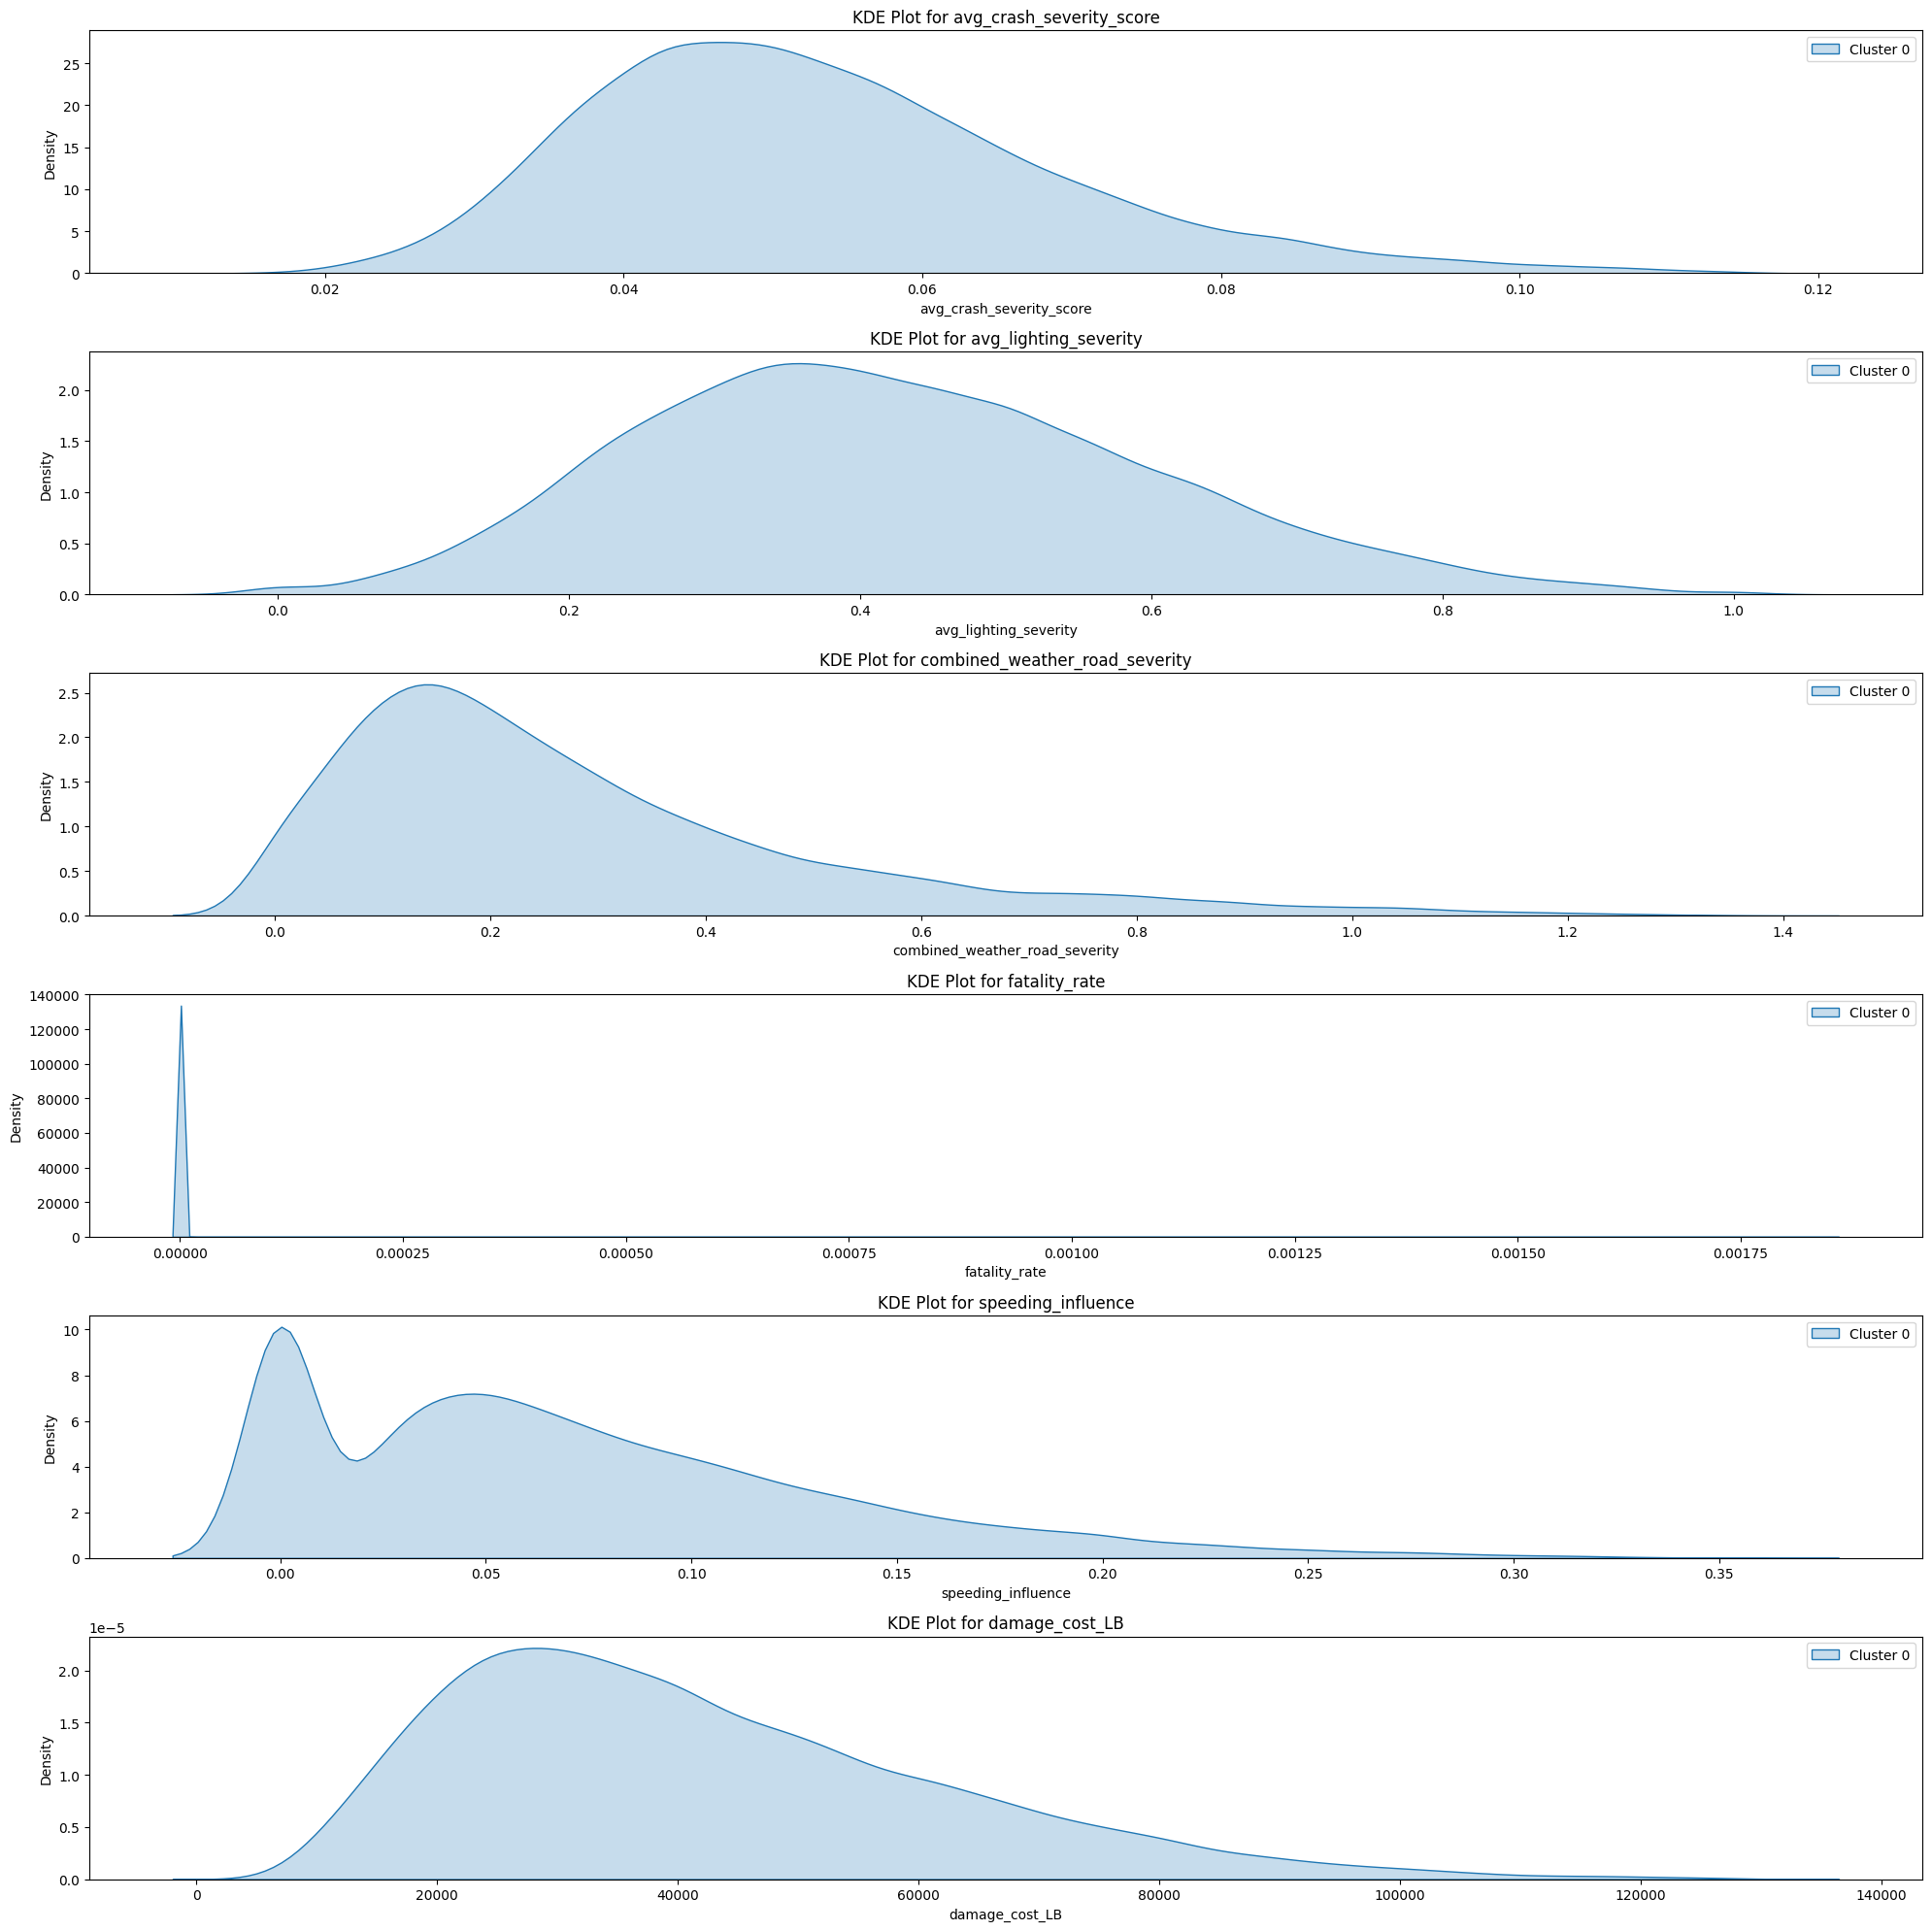

In [28]:
features = selected_features

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    for cluster in range(len(df['cluster'].unique())):
        sns.kdeplot(df[df['cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
    plt.title(f'KDE Plot for {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

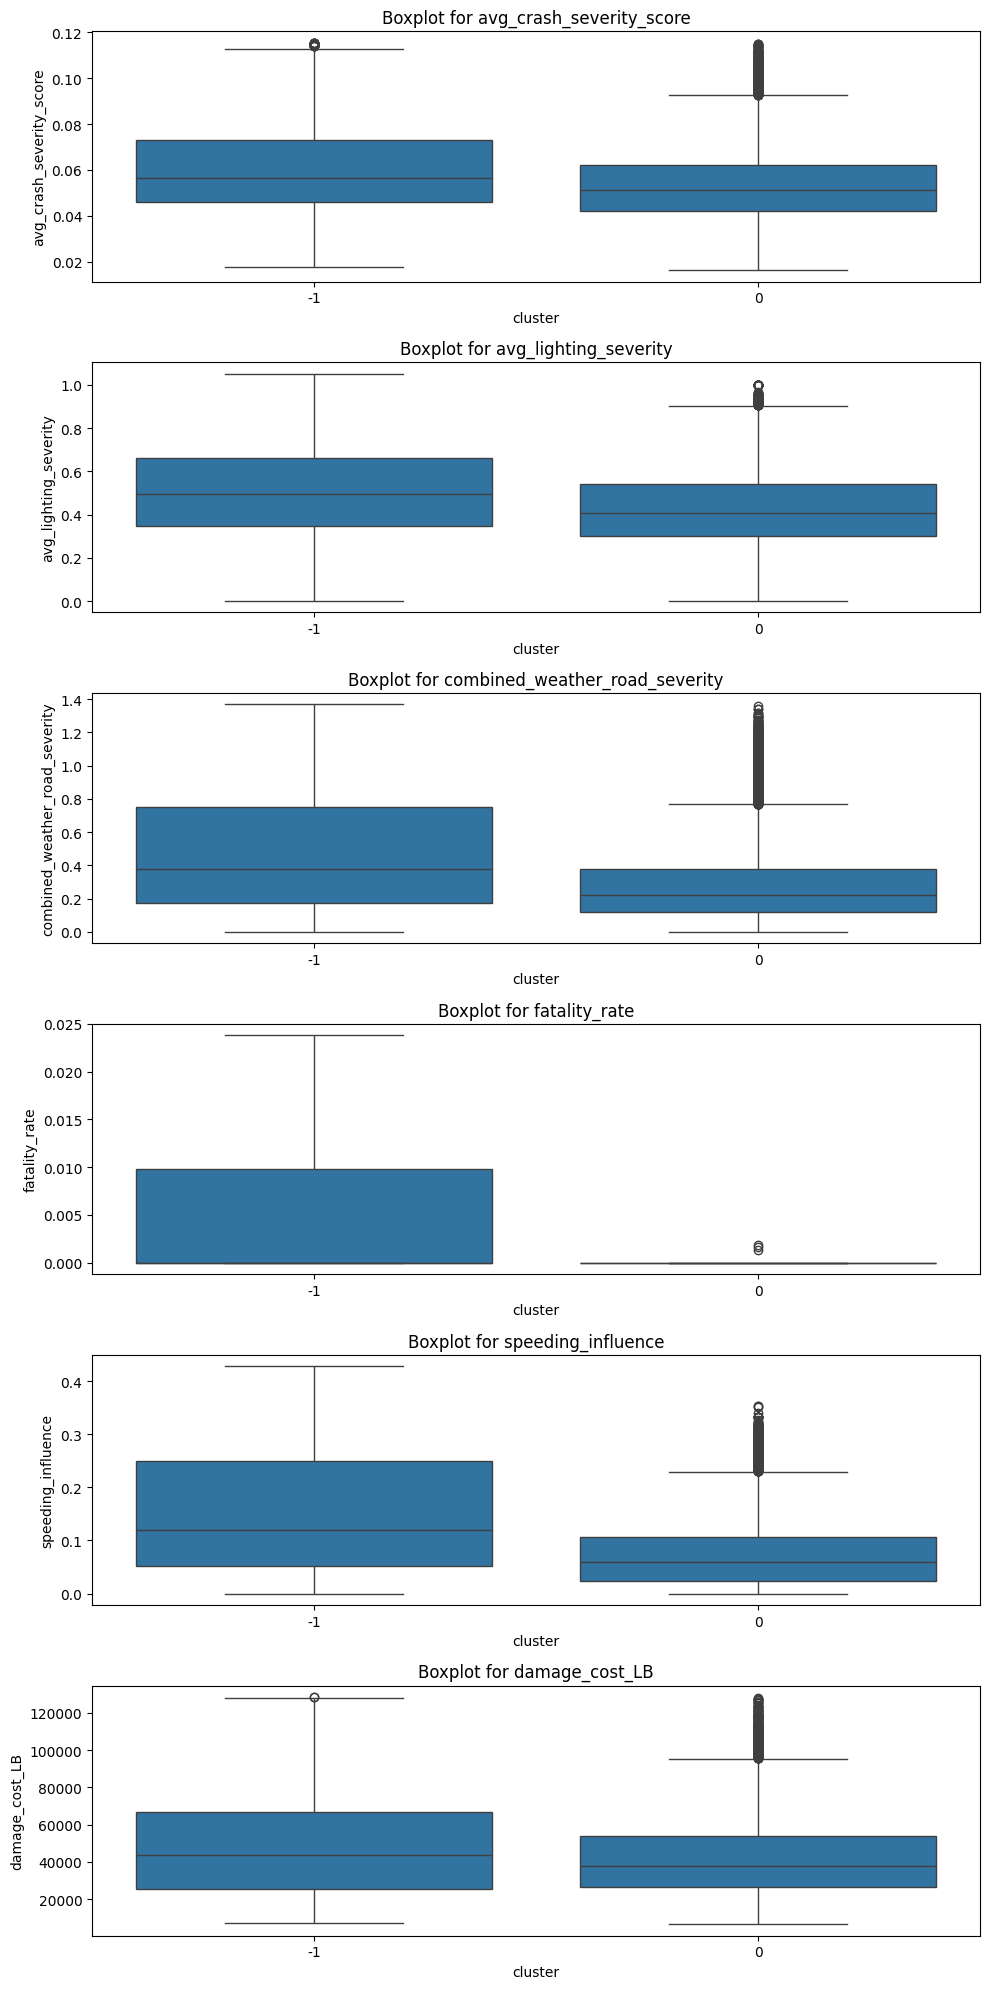

In [29]:
features = selected_features

plt.figure(figsize=(10, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()


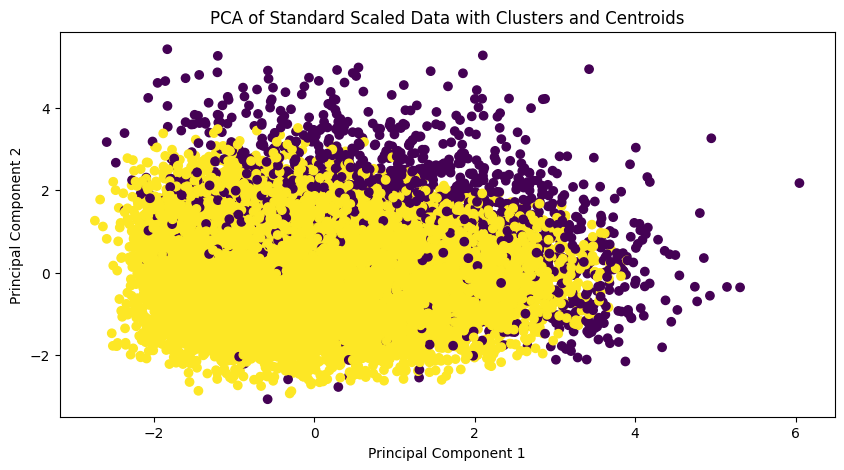

In [30]:
#pca with clusters
pca = PCA(n_components=2)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)

plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], c=labels, cmap='viridis')
plt.title('PCA of Standard Scaled Data with Clusters and Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [31]:
def clusters_pairplot(df):
    pairplot = sns.pairplot(
        df,
        hue='cluster',
        palette='Set1',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.5}
    )
    plt.legend()
    plt.show()


C:\Users\giuli\AppData\Local\Temp\ipykernel_8460\3491054098.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


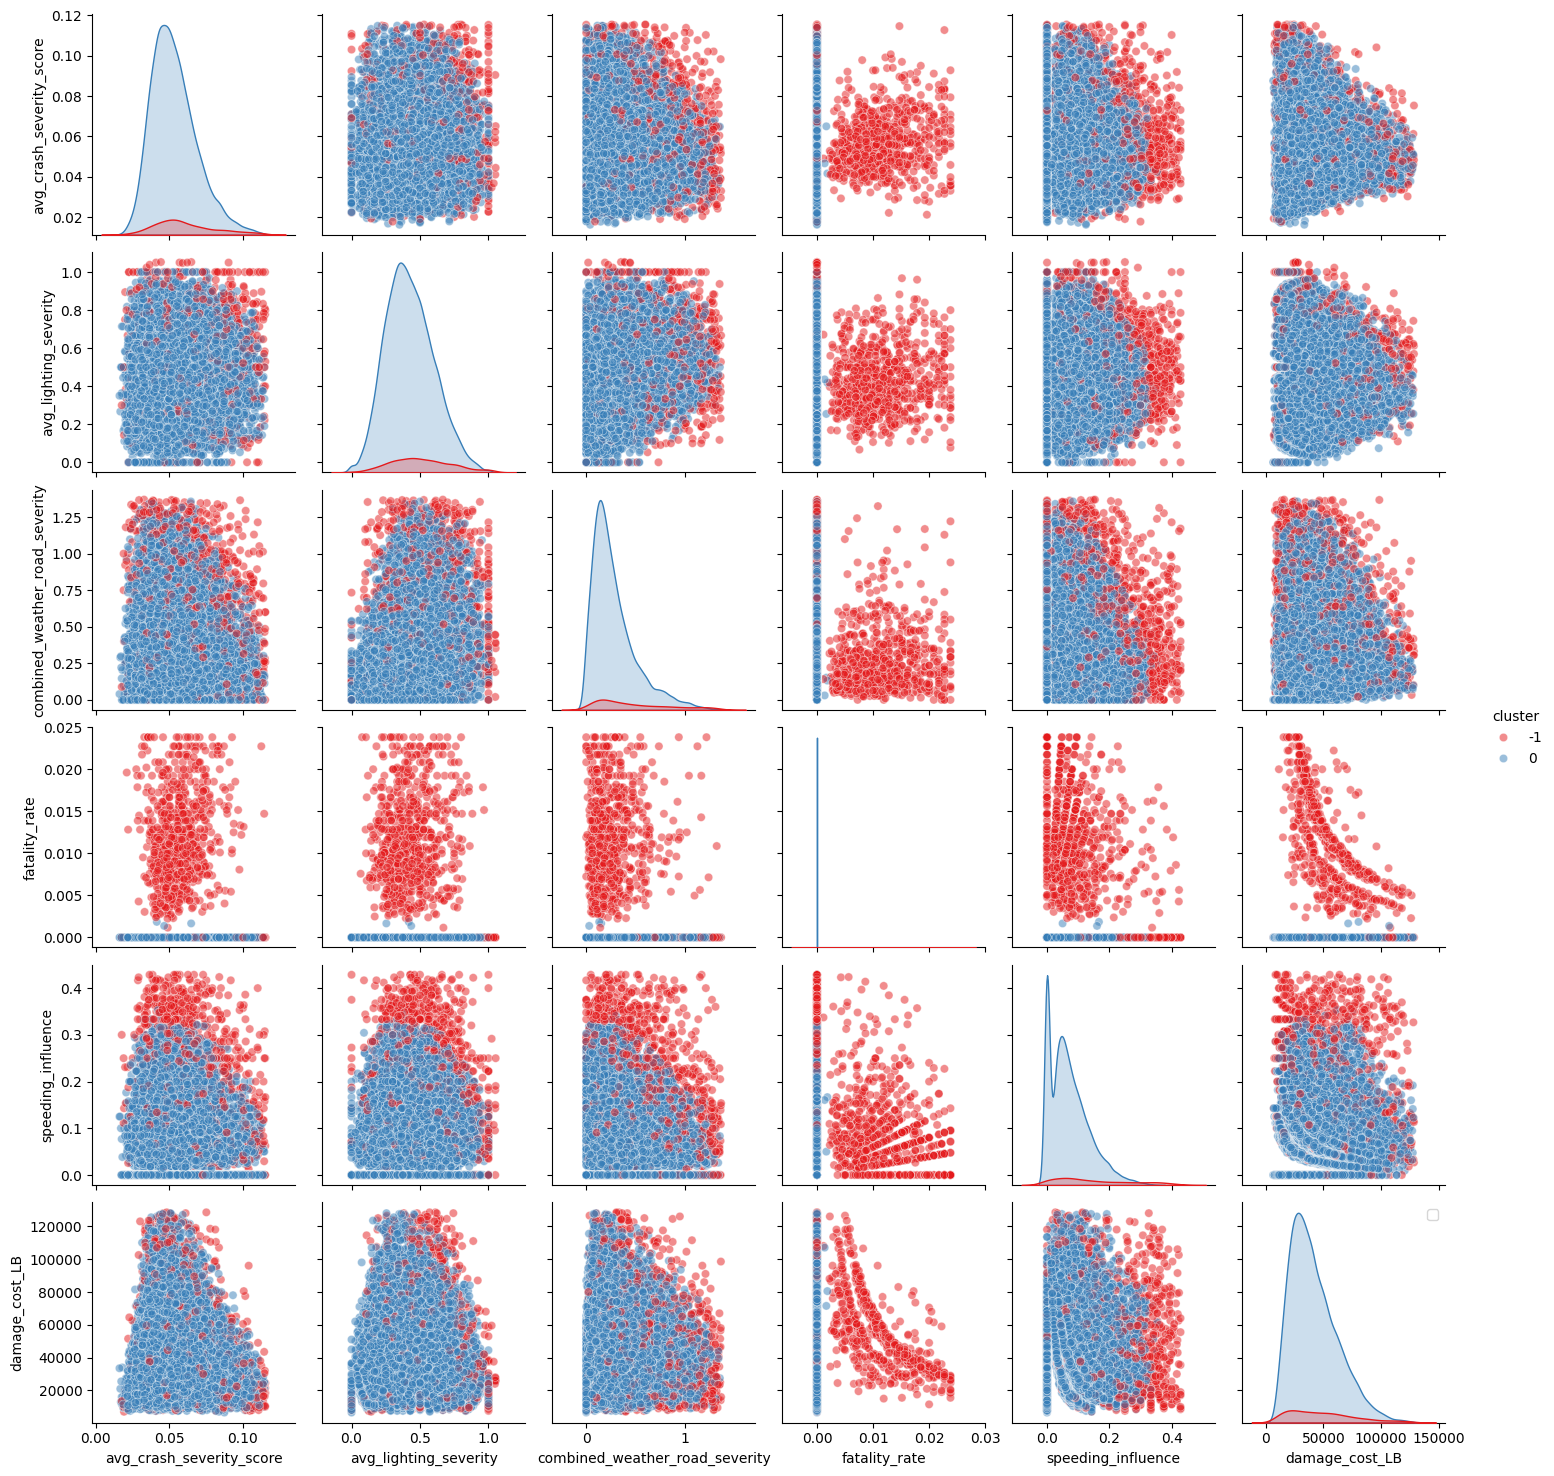

In [32]:
clusters_pairplot(df[selected_features + ['cluster']])

## Trying with min_points lower

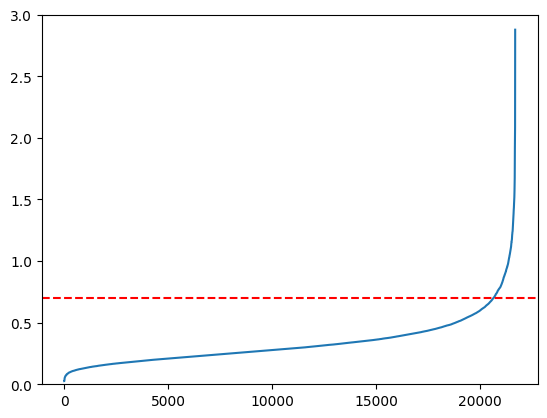

In [51]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_cluster_ss)
distances, indices = nbrs.kneighbors(df_cluster_ss)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
#line on the elbow
plt.axhline(y=0.7, color='r', linestyle='--')
plt.ylim(0, 3)
plt.show()

In [52]:
dbscan = DBSCAN(eps=0.9, min_samples=9)
labels = dbscan.fit_predict(df_cluster_ss)
df['cluster'] = labels
df['cluster'].value_counts()

cluster
 0    20489
-1     1071
 1       96
 2       19
 3       15
Name: count, dtype: int64

## Silhouette Score

In [53]:
silhouette_score(df_cluster_ss, labels)

np.float64(0.3924866521198125)

### Separation with davies_bouldin_score (Lower value = better clustering)

In [54]:
print('Separation %s' % metrics.davies_bouldin_score(df_cluster_ss, labels)) 

Separation 1.8193928295217738


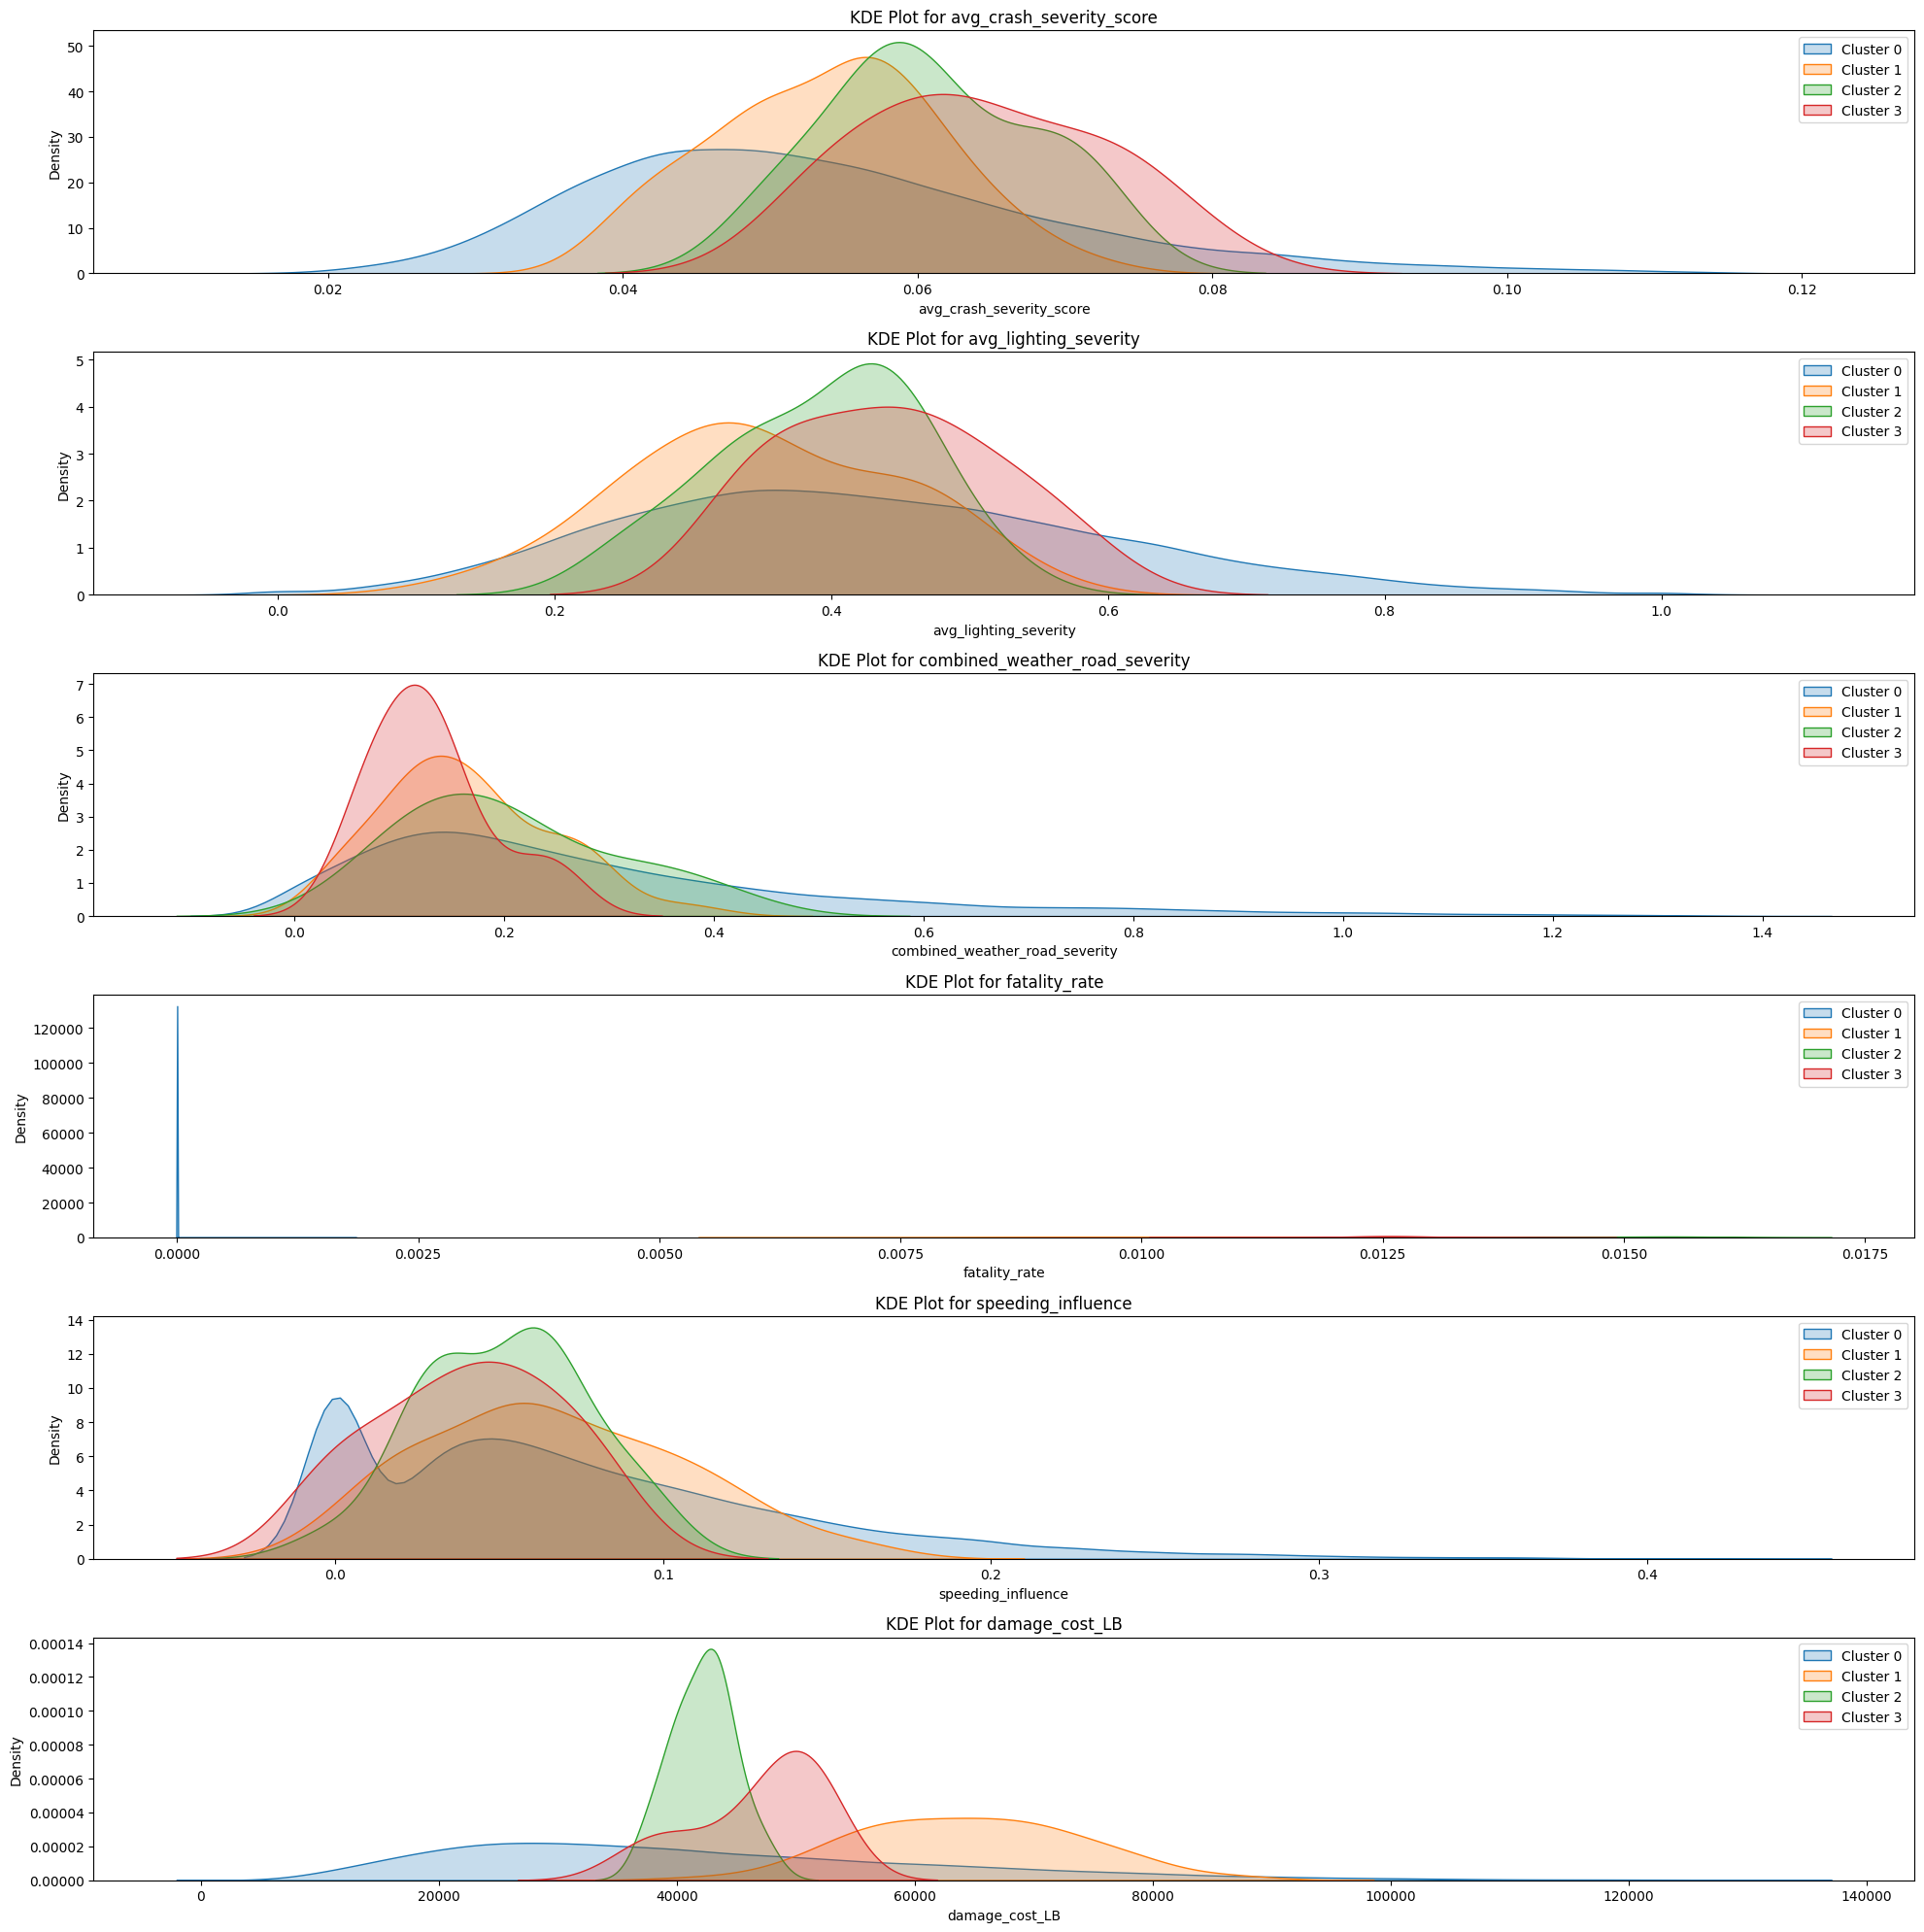

In [55]:
features = selected_features

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    for cluster in range(len(df['cluster'].unique())):
        sns.kdeplot(df[df['cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
    plt.title(f'KDE Plot for {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

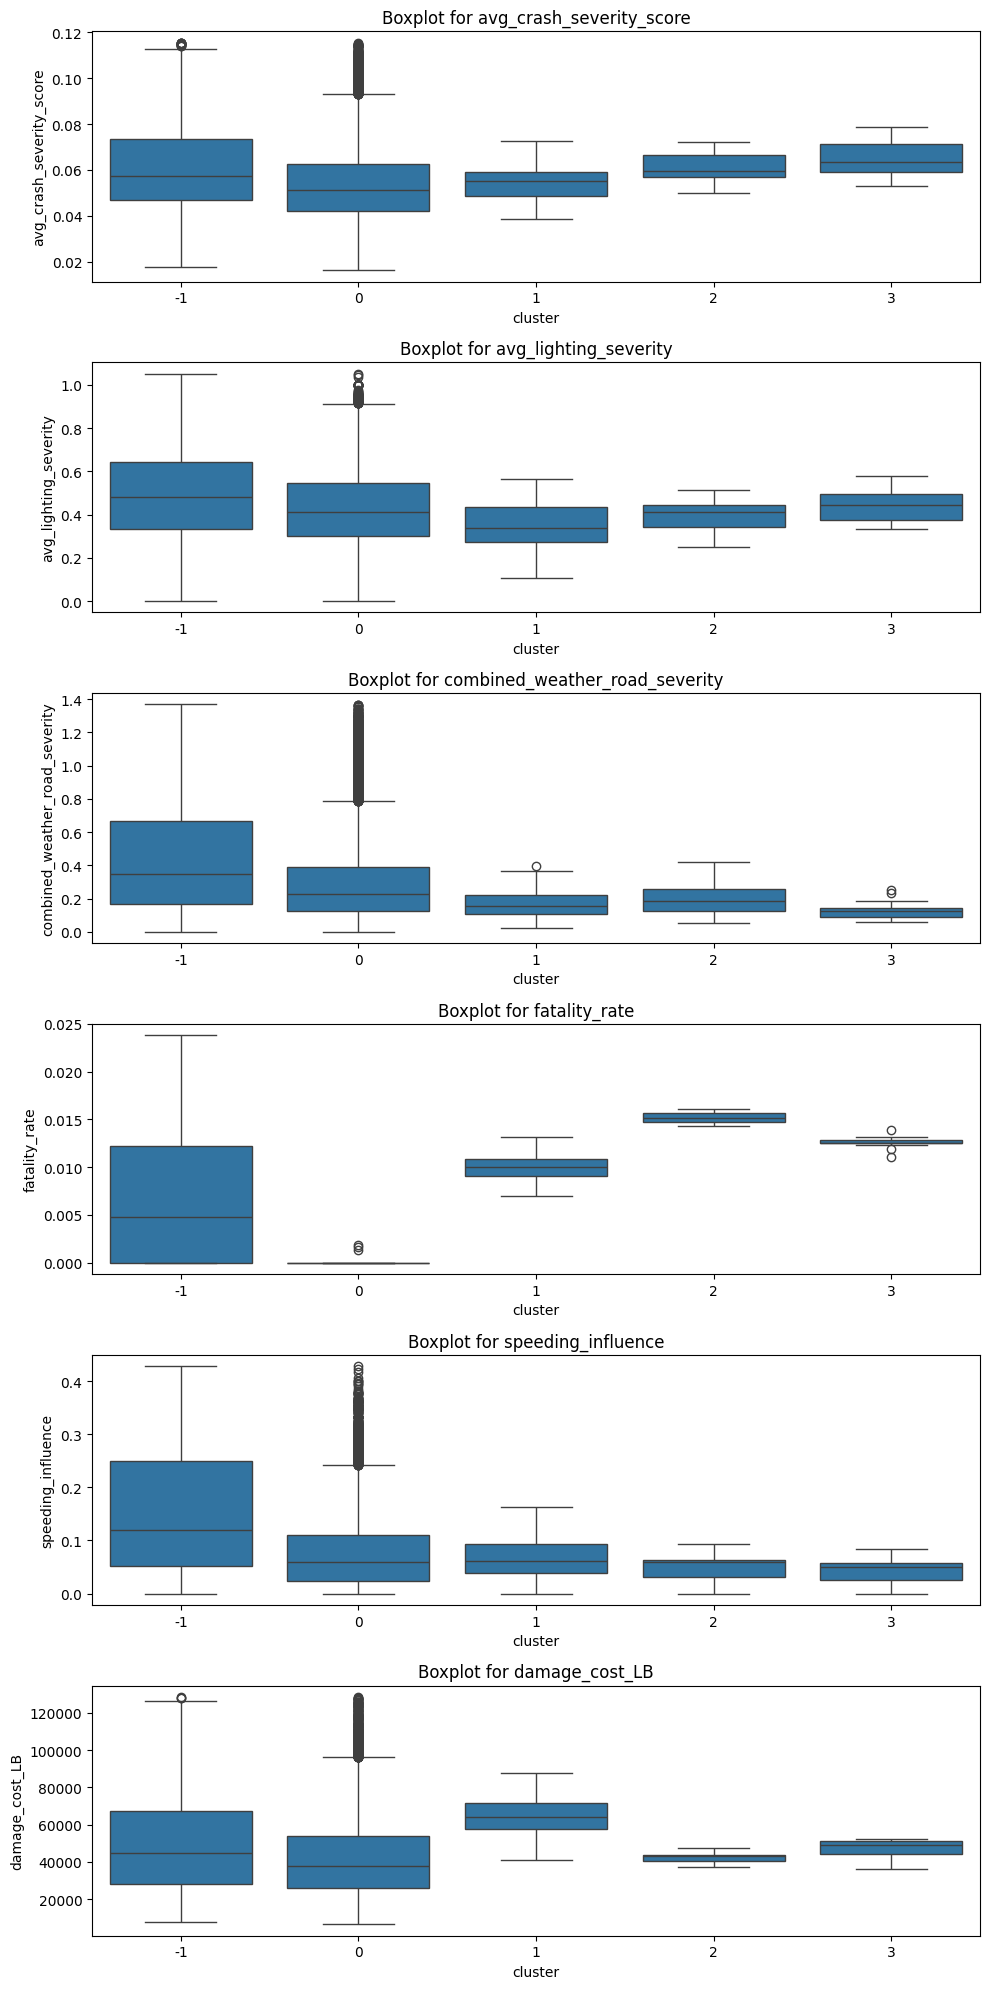

In [56]:
features = selected_features

plt.figure(figsize=(10, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()


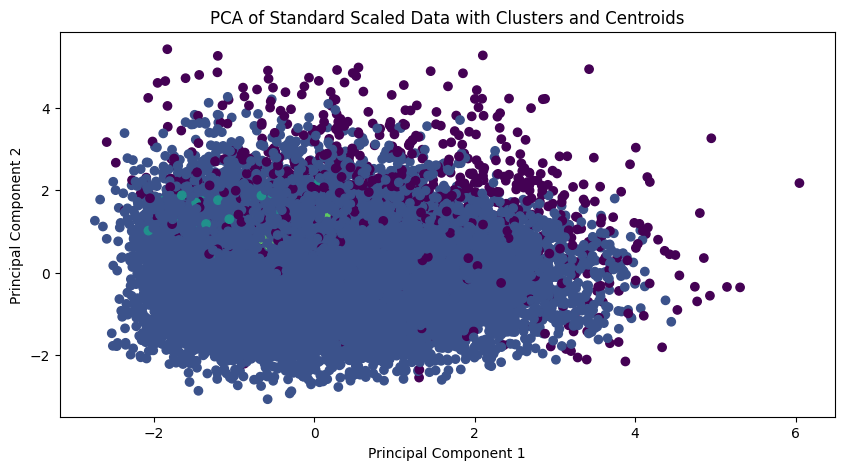

In [57]:
#pca with clusters
pca = PCA(n_components=2)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)

plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], c=labels, cmap='viridis')
plt.title('PCA of Standard Scaled Data with Clusters and Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [58]:
def clusters_pairplot(df):
    pairplot = sns.pairplot(
        df,
        hue='cluster',
        palette='Set1',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.5}
    )
    plt.legend()
    plt.show()


C:\Users\giuli\AppData\Local\Temp\ipykernel_8460\3491054098.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


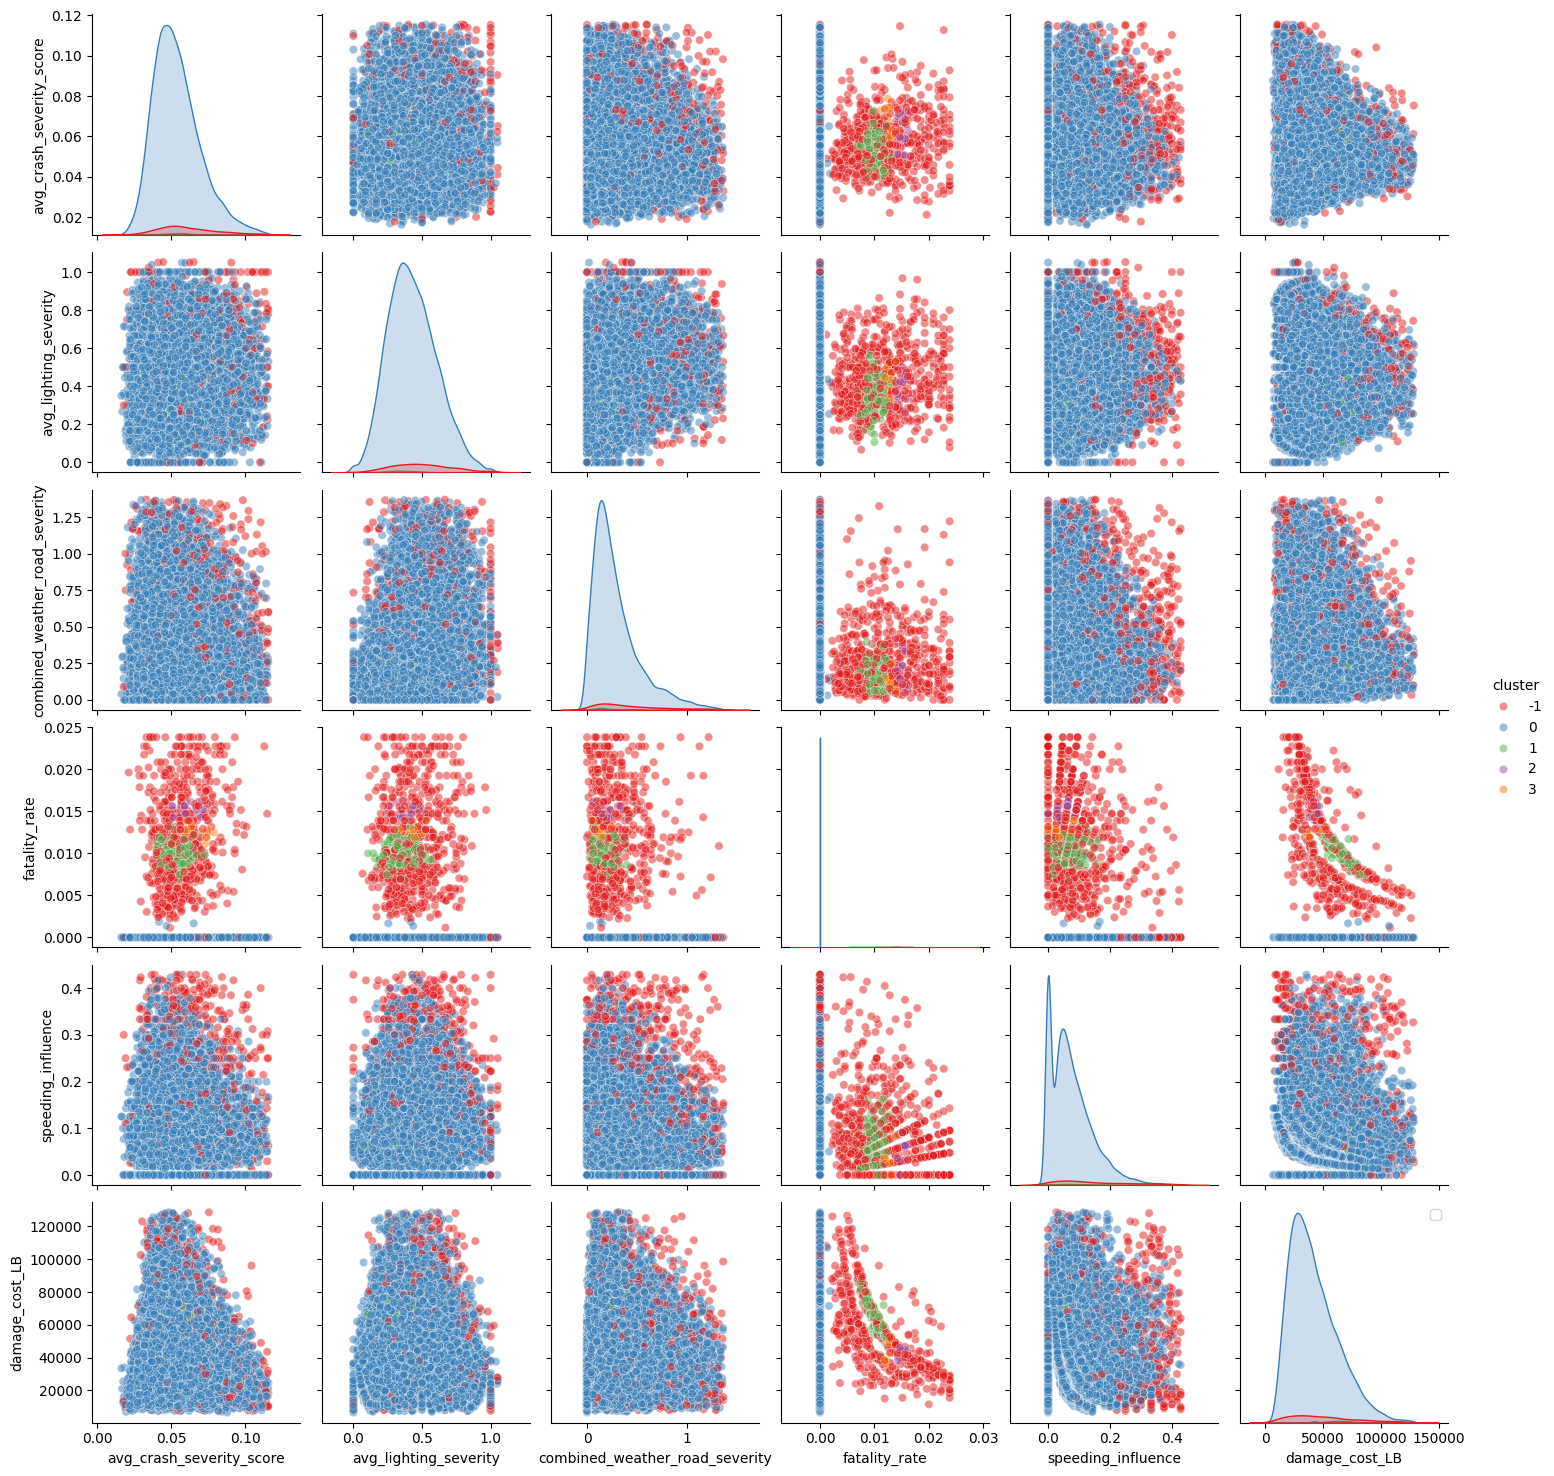

In [59]:
clusters_pairplot(df[selected_features + ['cluster']])

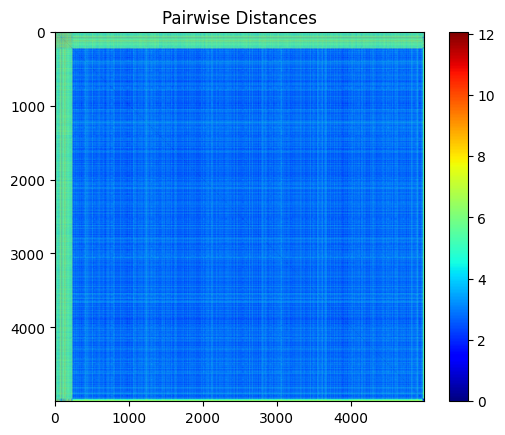

In [60]:
df_cluster_with_labels = df_cluster_ss.copy()
df_cluster_with_labels['cluster'] = labels

from sklearn.metrics import pairwise_distances
df_cluster_ss_subset = df_cluster_with_labels.sample(5000)
df_cluster_ss_subset = df_cluster_ss_subset.sort_values(by='cluster')
# compute the pairwise distances
distances = pairwise_distances(df_cluster_ss_subset[selected_features],metric='euclidean')

plt.imshow(distances, cmap ='jet')
plt.colorbar()
plt.title('Pairwise Distances')
plt.show()

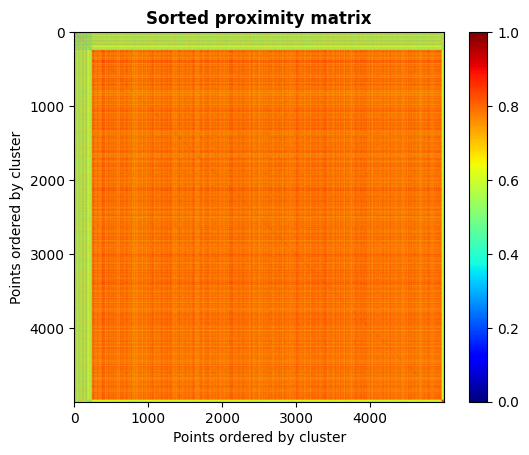

In [61]:
filtered_df = df_cluster_with_labels.sample(5000)
filtered_labels = filtered_df['cluster']
# Determine the pairwise distance matrix (using the Euclidean distance)
pairwise_distances_ = pairwise_distances(filtered_df, metric='euclidean')
# Cluster labels
n = len(filtered_labels)
# Sorting by labels
sorted_pairwisedist = pairwise_distances_[np.argsort(filtered_labels)][:, np.argsort(filtered_labels)]
# Keeping the distance values between 0 and 1.
sorted_pairwisedist = sorted_pairwisedist / np.max(sorted_pairwisedist)
sorted_similarity = 1 - sorted_pairwisedist / np.max(sorted_pairwisedist)
plt.title("Sorted proximity matrix", fontweight='bold')
plt.xlabel("Points ordered by cluster")
plt.ylabel("Points ordered by cluster")
plt.imshow(sorted_similarity, cmap='jet')
plt.colorbar()
plt.show()

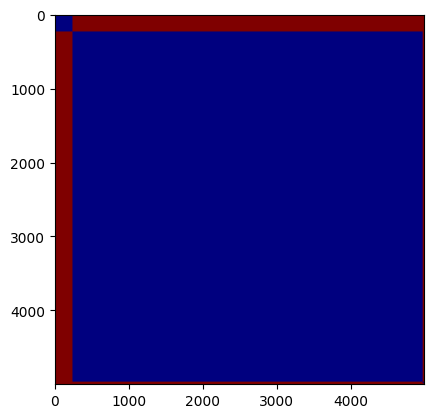

In [62]:
# The optimal distance matrix has 0 if the two points are in the same cluster, 1 otherwise
optimal_distances = np.ones(distances.shape)
# locate the indices of the points in the same cluster
same_cluster_indices = np.where(
    df_cluster_ss_subset['cluster'].values.reshape(-1,1) 
    == df_cluster_ss_subset['cluster'].values.reshape(1,-1)
)
# set the optimal distance to 0
optimal_distances[same_cluster_indices] = 0

plt.imshow(optimal_distances, cmap='jet')
plt.grid(False)

In [63]:
np.corrcoef(distances.reshape(-1), optimal_distances.reshape(-1))

array([[1.        , 0.57739584],
       [0.57739584, 1.        ]])